In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# importing the dataset
df = pd.read_csv('classification_dataset.csv')
df.head()

,url,isMalicious
0,songlyrics.com/news/riffd-the-shins-heartworms,0
1,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,0
2,gosugamers.net/lol/streams,0
3,thingiverse.com/corkyzett/collections/intlwome...,0
4,bausch.com/our-products/contact-lens-care/spec...,0


#checking dataset condition
check and clean dataset (duplicate, handling missingvalue, etc)

In [4]:
print(df.shape)

(194798, 2)


In [5]:
# count the label
df['isMalicious'].value_counts()

,count
isMalicious,
0,97399
1,97399


In [6]:
# find duplicate data if exist
df.duplicated().sum()

24259

In [7]:
# removing duplicate data
df = df.drop_duplicates()
df.shape

(170539, 2)

In [8]:
df['isMalicious'].value_counts()

,count
isMalicious,
0,97165
1,73374


In [9]:
# finding the missing value
df.isnull().sum()

,0
url,0
isMalicious,0


#tokenizing data
tokenize data where the symbol or non-alphanumeric character for seperating data  

In [10]:
# create a function
import re

def tokenize_url(url):
  """
  Tokenizes a URL by splitting it at any non-alphanumeric character.
  """
  text = re.findall(r'\w+', url)
  text = ' '.join(text)
  text = text.lower()
  return text


In [11]:
df['tokenized_url'] = df['url'].apply(tokenize_url)

df.sample(10)

,url,isMalicious,tokenized_url
77935,manutd.com/News-And-Features/Features/2016/Aug...,0,manutd com news and features features 2016 aug...
123834,kenaidanceta.com/www.spk.de/spk.sicherheit.htm,1,kenaidanceta com www spk de spk sicherheit htm
88266,pcwelt.de/produkte/Die_besten_Grafikkarten_bis...,0,pcwelt de produkte die_besten_grafikkarten_bis...
85320,lindquiststudios.com/Mark_Lindquist.htm,0,lindquiststudios com mark_lindquist htm
77719,ncronline.org/blogs/ncr-today,0,ncronline org blogs ncr today
67606,alfredapp.com/help/features/system,0,alfredapp com help features system
143790,theplan.it/libraries/joomla/trade,1,theplan it libraries joomla trade
38255,cdu.edu.au/business-government/partnerships-cu...,0,cdu edu au business government partnerships cu...
56561,uah.es/es/aula-virtual,0,uah es es aula virtual
30840,worldscientific.com/action/showLogin?uri=%2F,0,worldscientific com action showlogin uri 2f


pre-processing data before training to TensorFlow

In [12]:
# separate labels data and and tokenize data into array
urls = df['url'].values
tokenized_url = df['tokenized_url'].values
labels = df['isMalicious'].values

# count
print(len(urls))
print(len(tokenized_url))
print(len(labels))

170539
170539
170539


In [13]:
# print 2 random data from tokenize and label data
import random
for i in random.sample(range(len(tokenized_url)), 2):
  print(urls[i])
  print(tokenized_url[i])
  print(labels[i])
  print()


tjwhaf.com?"../zyjy/zyjyxw/201609/t20160913_672990.html"
tjwhaf com zyjy zyjyxw 201609 t20160913_672990 html
0

athome.co.jp/kochi
athome co jp kochi
0



# Text Vectorization

In [14]:
word_counts = [len(element.split()) for element in tokenized_url]
max_word_count = max(word_counts)
max_index = word_counts.index(max_word_count)

print(f"Elemen dengan jumlah kata paling banyak adalah elemen ke-{max_index + 1} dengan {max_word_count} kata.")
print(f"Isi elemen tersebut: '{tokenized_url[max_index]}'")

Elemen dengan jumlah kata paling banyak adalah elemen ke-125920 dengan 198 kata.
Isi elemen tersebut: 'secretpress org erin category c3 83 c2 83 c3 82 c2 83 c3 83 c2 82 c3 82 c2 83 c3 83 c2 83 c3 82 c2 82 c3 83 c2 82 c3 82 c2 a7 c3 83 c2 83 c3 82 c2 83 c3 83 c2 82 c3 82 c2 82 c3 83 c2 83 c3 82 c2 82 c3 83 c2 82 c3 82 c2 bb c3 83 c2 83 c3 82 c2 83 c3 83 c2 82 c3 82 c2 82 c3 83 c2 83 c3 82 c2 82 c3 83 c2 82 c3 82 c2 98 c3 83 c2 83 c3 82 c2 83 c3 83 c2 82 c3 82 c2 83 c3 83 c2 83 c3 82 c2 82 c3 83 c2 82 c3 82 c2 a3 c3 83 c2 83 c3 82 c2 83 c3 83 c2 82 c3 82 c2 82 c3 83 c2 83 c3 82 c2 82 c3 83 c2 82 c3 82 c2 80 c3 83 c2 83 c3 82 c2 83 c3 83 c2 82 c3 82 c2 82 c3 83 c2 83 c3 82 c2 82 c3 83 c2 82 c3 82 c2 82 ripper street'


In [15]:
#set parameter berikut agar mudah digunakan dan diubah(penjelasan parameter ada dibawah saat menggunakannya)
VOCAB_SIZE = 10000
MAX_LENGTH = 75
EMBEDDING_DIM = 128
PADDING_TYPE = 'pre'
TRUNC_TYPE = 'post'

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
vectorize = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE
)
vectorize.adapt(tokenized_url)
corpus = vectorize.get_vocabulary()

In [18]:
for i in random.sample(range(len(corpus)), 10):
  print(f'{i}: {corpus[i]}')

7940: vidanapraia
457: social
7900: 14345
9576: operation
3513: underarmour
1336: 68
1395: 211
851: redirection
5232: basics
7000: syzran


In [19]:
with open('corpus.txt', 'w') as file:
    for word in corpus:
        file.write(f"{word}\n")

print("Corpus berhasil disimpan ke corpus.txt")

Corpus berhasil disimpan ke corpus.txt


# splitting train and test data

In [20]:
# splitting train and test data 80:20
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80:20)
tokenized_train, tokenized_test, labels_train, labels_test = train_test_split(
    tokenized_url, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Training data shapes:")
print("Tokenized URLs:", tokenized_train.shape)
print("Labels:", labels_train.shape)

print("\nTesting data shapes:")
print("Tokenized URLs:", tokenized_test.shape)
print("Labels:", labels_test.shape)

Training data shapes:
Tokenized URLs: (136431,)
Labels: (136431,)

Testing data shapes:
Tokenized URLs: (34108,)
Labels: (34108,)


In [21]:
# tokenize the data and paded
train_sequences = vectorize(tokenized_train)
test_sequences = vectorize(tokenized_test)

# padding
train_padded = pad_sequences(train_sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)
test_padded = pad_sequences(test_sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

In [ ]:
print(train_padded.shape)
print(labels_train.shape)
print()

print(test_padded.shape)
print(labels_test.shape)
print()

for i in random.sample(range(len(tokenized_train)), 2):
  print(tokenized_train[i])
  print(train_padded[i])
  print()

(136431, 75)
(136431,)

(34108, 75)
(34108,)

plex ir work f6be29dc274294b439a8b366c6bda2dd
[  1 380 266   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]

homedepot com webapp wcs stores servlet logonform storeid 10051 langid 1 catalogid 10053 url userregistrationupdateform
[   1    2 1354 2029 1195 1063    1 3520    1 4349    9 3702    1  164
    1    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]



# neural network

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_padded, labels_train)).shuffle(buffer_size=10000).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((test_padded, labels_test)).batch(8)

In [23]:
for batch_data, batch_labels in train_dataset.take(1):  # ambil 1 batch
    print("Data batch pertama: ", batch_data.numpy())  # Data input
    print("Label batch pertama: ", batch_labels.numpy())  # Label target

Data batch pertama:  [[4267    2  109  109   14    4    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   1    1  112    1    1   55    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [ 209    2  254  140    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0   

## Flatten

In [24]:
# flatten model
model_flatten = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(MAX_LENGTH,)),
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_flatten.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_flatten.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 75, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │          57,606 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,337,613 (5.10 MB)

 Trainable params: 1,337,613 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

## Convolutional

In [25]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(MAX_LENGTH,)),
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 75, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 71, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,362,829 (5.20 MB)

 Trainable params: 1,362,829 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

# Recurent Neural Network

## LSTM

In [26]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(MAX_LENGTH,)),
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 75, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,613 (5.04 MB)

 Trainable params: 1,321,613 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

## GRU

The *Gated Recurrent Unit* or [GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU) is usually referred to as a simpler version of the LSTM. It can be used in applications where the sequence is important but you want faster results and can sacrifice some accuracy. You will notice in the model summary that it is a bit smaller than the LSTM and it also trains faster by a few seconds.

In [27]:
# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(MAX_LENGTH,)),
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 75, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          31,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,311,501 (5.00 MB)

 Trainable params: 1,311,501 (5.00 MB)

 Non-trainable params: 0 (0.00 B)

# Plot Utility

In [30]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Training Model

In [47]:
# training for flatten model
history_flatten = model_flatten.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 230s 13ms/step - accuracy: 0.9680 - loss: 0.0762 - val_accuracy: 0.9419 - val_loss: 0.1967
Epoch 2/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 265s 14ms/step - accuracy: 0.9684 - loss: 0.0753 - val_accuracy: 0.9423 - val_loss: 0.2045
Epoch 3/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 261s 14ms/step - accuracy: 0.9693 - loss: 0.0732 - val_accuracy: 0.9416 - val_loss: 0.2066
Epoch 4/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 227s 13ms/step - accuracy: 0.9702 - loss: 0.0724 - val_accuracy: 0.9400 - val_loss: 0.2095
Epoch 5/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 225s 13ms/step - accuracy: 0.9701 - loss: 0.0719 - val_accuracy: 0.9419 - val_loss: 0.2054
Epoch 6/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 261s 13ms/step - accuracy: 0.9706 - loss: 0.0707 - val_accuracy: 0.9419 - val_loss: 0.2177
Epoch 7/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 219s 13ms/step - accuracy: 0.9708 - loss: 0.0704 - val_accuracy: 0.9405 - val_loss: 0.2152
Epoch 8/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 220s 13ms/s

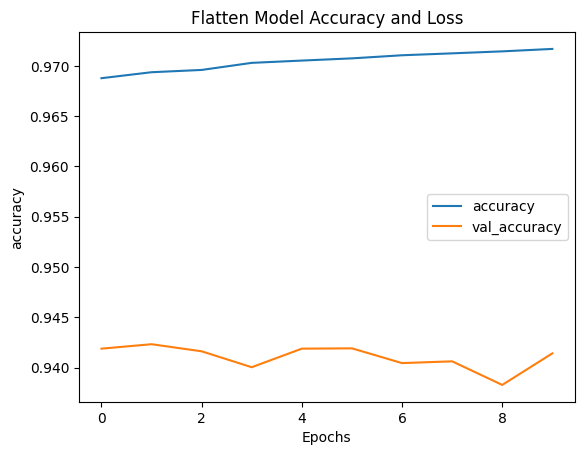

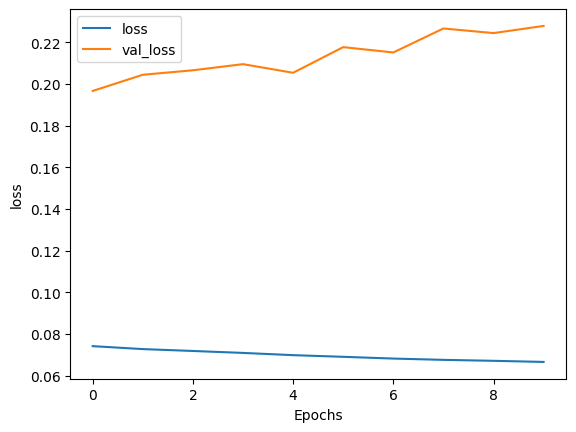

In [48]:
plt.title('Flatten Model Accuracy and Loss')
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

In [32]:
# training for convolutional model
history_conv = model_conv.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 383s 22ms/step - accuracy: 0.8849 - loss: 0.2567 - val_accuracy: 0.9408 - val_loss: 0.1470
Epoch 2/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 380s 22ms/step - accuracy: 0.9437 - loss: 0.1367 - val_accuracy: 0.9446 - val_loss: 0.1414
Epoch 3/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 375s 22ms/step - accuracy: 0.9519 - loss: 0.1186 - val_accuracy: 0.9465 - val_loss: 0.1366
Epoch 4/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 377s 22ms/step - accuracy: 0.9563 - loss: 0.1061 - val_accuracy: 0.9468 - val_loss: 0.1385
Epoch 5/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 385s 22ms/step - accuracy: 0.9590 - loss: 0.0990 - val_accuracy: 0.9443 - val_loss: 0.1475
Epoch 6/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 383s 22ms/step - accuracy: 0.9625 - loss: 0.0930 - val_accuracy: 0.9472 - val_loss: 0.1512
Epoch 7/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 369s 22ms/step - accuracy: 0.9640 - loss: 0.0876 - val_accuracy: 0.9469 - val_loss: 0.1582
Epoch 8/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 371s 22ms/s

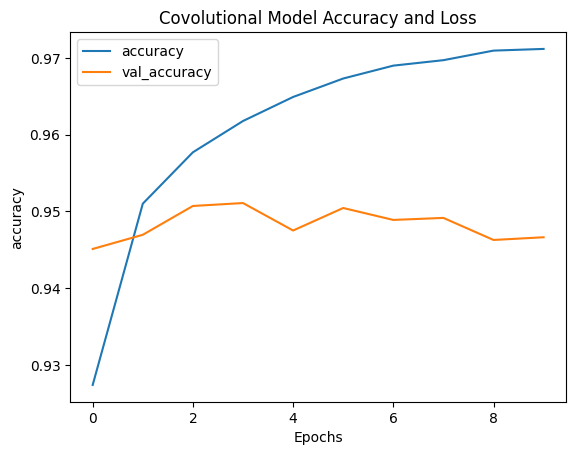

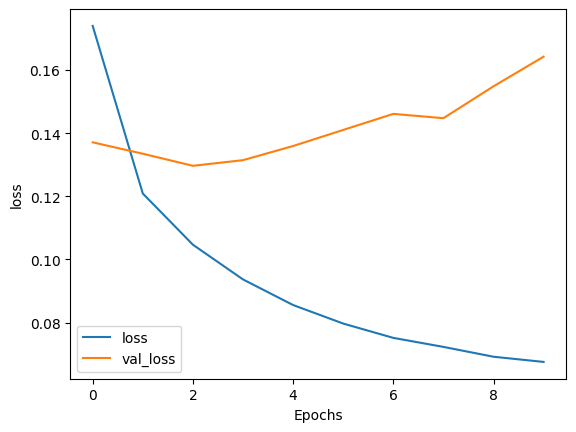

In [42]:
plt.title('Covolutional Model Accuracy and Loss')
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

In [33]:
# training for LSTM model
history_lstm = model_lstm.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1207s 71ms/step - accuracy: 0.8951 - loss: 0.2363 - val_accuracy: 0.9416 - val_loss: 0.1399
Epoch 2/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1214s 70ms/step - accuracy: 0.9467 - loss: 0.1296 - val_accuracy: 0.9463 - val_loss: 0.1306
Epoch 3/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1208s 71ms/step - accuracy: 0.9550 - loss: 0.1098 - val_accuracy: 0.9482 - val_loss: 0.1316
Epoch 4/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1213s 71ms/step - accuracy: 0.9599 - loss: 0.0978 - val_accuracy: 0.9497 - val_loss: 0.1293
Epoch 5/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1212s 71ms/step - accuracy: 0.9634 - loss: 0.0888 - val_accuracy: 0.9481 - val_loss: 0.1371
Epoch 6/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1248s 73ms/step - accuracy: 0.9665 - loss: 0.0821 - val_accuracy: 0.9487 - val_loss: 0.1380
Epoch 7/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1204s 71ms/step - accuracy: 0.9685 - loss: 0.0770 - val_accuracy: 0.9501 - val_loss: 0.1451
Epoch 8/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1222

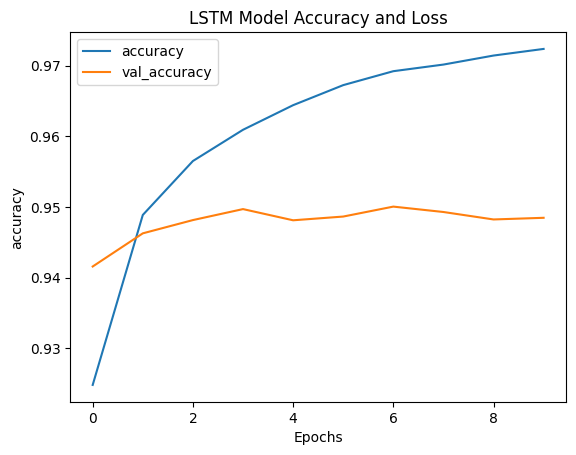

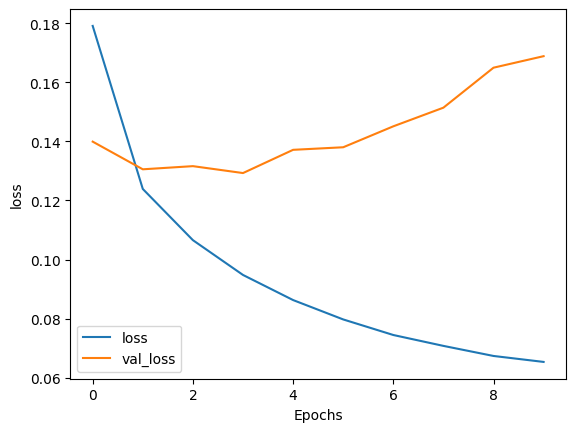

In [43]:
plt.title('LSTM Model Accuracy and Loss')
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

In [34]:
# training for GRU model
history_gru = model_gru.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1382s 81ms/step - accuracy: 0.8973 - loss: 0.2317 - val_accuracy: 0.9451 - val_loss: 0.1371
Epoch 2/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1390s 80ms/step - accuracy: 0.9487 - loss: 0.1261 - val_accuracy: 0.9470 - val_loss: 0.1335
Epoch 3/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1410s 83ms/step - accuracy: 0.9563 - loss: 0.1080 - val_accuracy: 0.9507 - val_loss: 0.1297
Epoch 4/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1393s 82ms/step - accuracy: 0.9607 - loss: 0.0964 - val_accuracy: 0.9511 - val_loss: 0.1315
Epoch 5/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1365s 80ms/step - accuracy: 0.9637 - loss: 0.0881 - val_accuracy: 0.9475 - val_loss: 0.1359
Epoch 6/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1375s 81ms/step - accuracy: 0.9661 - loss: 0.0829 - val_accuracy: 0.9505 - val_loss: 0.1410
Epoch 7/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1378s 81ms/step - accuracy: 0.9684 - loss: 0.0770 - val_accuracy: 0.9489 - val_loss: 0.1461
Epoch 8/10
17054/17054 ━━━━━━━━━━━━━━━━━━━━ 1374

# save model

In [35]:
# flatten model
model_flatten.save('model_flatten.h5')

In [36]:
# convolutional model
model_conv.save('model_convolutional.h5')

In [37]:
# lstm model
model_lstm.save('model_lstm.h5')

In [38]:
# gru model
model_gru.save('model_gru.h5')